In [1]:
import time
from  nltk.tokenize import sent_tokenize,word_tokenize
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer

In [2]:
import nltk
from nltk.corpus import stopwords
stop_words=set(stopwords.words('english'))
import codecs
import collections 
import seaborn

In [3]:
import os
import copy
import numpy as np
from nltk.stem.wordnet import WordNetLemmatizer
import random

In [4]:
def size(dict_list):
    sum=0
    for i in dict_list.keys():
        sum+=dict_list[i]
    return sum

In [5]:
def accuracy(predict,true):
    count=0
    for i in range(len(predict)):
        if predict[i]==true[i]:
            count+=1
    return count/float(len(predict))

In [6]:
#geeks for geeks 
def sort_list(list1, list2): 
    zipped_pairs = zip(list2, list1) 
    z = [x for _, x in sorted(zipped_pairs)] 
    return z 

In [7]:
def find_number(str1):
    s=[]
    s1=''
    for i in range(len(str1)):
        s.append(str1[i])
#     print(s)
#     print(s)
    name=[]
    name1=''
    for i in range(len(s)):
        if s[i]>='0' and s[i]<='9':
            name=s[i:]
            break
    for i in range(len(name)):
        name1=name1+name[i]
    return str(name1)

In [8]:
def punc_improve(str1):
    s=[]
    s1=''
    for i in range(len(str1)):
        s.append(str1[i])
#     print(s)

    for i in range(len(s)):
        if (s[i]=='.' or s[i]==',' or  s[i]=='!'or  s[i]=='*' or s[i]=='+'  or s[i]=='-' or s[i]=='\"'  or s[i]=='\'' or
            s[i]=='{' or s[i]=='}' or s[i]==';' or s[i]==':' or s[i]=='(' or s[i]==')' or
        s[i]=='='  or s[i]=='@' or s[i]=='>' or s[i]=='[' or s[i]==']' or s[i]=='|' 
        or s[i]=='#' or s[i]=='%' or s[i]=='`' or s[i]=='~' or s[i]=="/" or s[i]=='_' or s[i]=='<' or s[i]=='?' or  s[i]==' ' or s[i]=='$' or s[i]=='^'or s[i]=='' or s[i]==' ' or s[i]=='&'):
            pass
        else:
            s1=s1+s[i]
        
    return s1


In [9]:
def dash_improve(str1):
    s=[]
    s1=''
    for i in range(len(str1)):
        s.append(str1[i])
#     print(s)

    for i in range(len(s)):
        if s[i]!='-':
            s1=s1+s[i]
    return s1

In [10]:
def digit_improve(str1):
    s=[]
    s1=''
    for i in range(len(str1)):
        s.append(str1[i])
#     print(s)
    for i in range(len(s)):
        if s[i]=='0':
            s1=s1+'zero'
        if s[i]=='1':
            s1=s1+'one'
        if s[i]=='2':
            s1=s1+'two'
        if s[i]=='3':
            s1=s1+'three'
        if s[i]=='4':
            s1=s1+'four'
        if s[i]=='5':
            s1=s1+'five'
        if s[i]=='6':
            s1=s1+'six'
        if s[i]=='7':
            s1=s1+'seven'
        if s[i]=='8':
            s1=s1+'eight'
        if s[i]=='9':
            s1=s1+'nine'
        if s[i]>='0' and s[i]<='9':
            pass
        else:
            s1=s1+s[i]
    return s1


In [11]:
# temp={}
# for j in train:

#     temp[j]=class_wise[i][j]
# class_wise1.append(temp)

In [12]:
def random_split(class_wise,train_size,test_size):
    train_size=int(train_size*len(class_wise[0])/float(100))
    test_size=len(class_wise[0].keys())-train_size
    train_set={}
    test_set={}
    class_wise1=[]
    class_wise2=[]
    for i in range(len(class_wise)):
        keys=class_wise[i].keys()
        shuffled_data=random.sample(keys, len(keys))
        train=shuffled_data[:train_size]
        test=shuffled_data[train_size:]
        train_data=[]
        test_data=[]
        temp={}
        for j in train:
            temp[j]=class_wise[i][j]
            train_data.append(class_wise[i][j])
        class_wise1.append(temp)
        temp={}
        for j in test:
            temp[j]=class_wise[i][j]
            test_data.append(class_wise[i][j])
        class_wise2.append(temp)
        # sum the values with same keys 
    counter = collections.Counter() 
    for d in train_data:  
        counter.update(d) 

    train_set = dict(counter) 
    counter = collections.Counter() 
    for d in test_data:  
        counter.update(d) 

    test_set = dict(counter)
#     print(len(test_set))
    return class_wise1,class_wise2,train_set,test_set
     
    

In [13]:
#Here we wil get the sub-folders
os.chdir('20_newsgroups')
directories=os.listdir()

In [14]:
eliminate=['comp.graphics', 'sci.med', 'talk.politics.misc', 'rec.sport.hockey','sci.space']

In [15]:
start1=time.time()

In [228]:
files=[]
union_set=[]
postings={}
corpus={}
corpus1={}
vocub={}
vocub_main=[]
term_frequency={}
counter=0
for i in range(len(directories)):
    files.append(copy.deepcopy([]))
class_wise=[]
for i in range(len(directories)):
    corpus_small={}
    if directories[i] in eliminate:
        print(counter)
        counter=counter+1
        
        address=os.getcwd()+"\\"+str(directories[i])
        os.chdir(address)
        files_in_dir=os.listdir()
        for j in range(len(files_in_dir)):

            files[i].append(directories[i]+"/"+files_in_dir[j])
            address1=address+"\\"+files_in_dir[j]
            c=[]
            union_set=union_set+[files[i][j]]
            offset=0
            #stackoverflow
            f=codecs.open(address1,'r',encoding='utf_8',errors="ignore")

            c = f.readlines()

            final=[]
#             in1=c.index('\n')
            for k in range(0,len(c)):

                final.append(c[k])
            #Final is a list of sentences 
            tokenizer = RegexpTokenizer(r'\w+')
            #Tokenizer previously used
    #         tokenizer=RegexpTokenizer('\s+',gaps=True)
            lemmatizer = WordNetLemmatizer()

            temp1=[]
            vocub={}
            for k in range(len(final)):
                temp=[]
                temp=tokenizer.tokenize(final[k])
                temp=[lemmatizer.lemmatize(w,pos='v') for w in temp]
                temp =[w.lower() for w in temp]
                
             
    #             print("Stop Wro",temp)

                for n in range(len(temp)):
#                     if hasNumbers(temp[n]):
#                         continue
#                     if temp[n].isdigit():
#                         continue
                    temp2=copy.deepcopy(temp[n])
                    t1=str(dash_improve(str(temp2)))

                    temp2=t1
                    t2=str(digit_improve(str(temp2)))

                    temp2=t2
                    t3=str(punc_improve(str(temp2)))

                    temp2=t3

                    if temp2==list(['']) or temp2==list([' ']) or temp2=='' or temp2==' ':
                        pass
                    else:
                        temp4=[]
                        temp4.append(temp2)
                        temp1=temp1+temp4
                    if temp2 in vocub.keys():
                        vocub[temp2]=vocub[temp2]+1
                    else:
                        vocub[temp2]=1

            corpus1[files[i][j]]=temp1
            corpus[files[i][j]]=vocub
            corpus_small[files[i][j]]=vocub
            vocub_main=set(vocub_main).union(set(temp1))
    #         if (counter % 5000)==0:
    #             print("Count ",counter)
    #         counter=counter+1
            for k in set(corpus[files[i][j]]):

                if k in postings.keys():
                    if files[i][j] in postings[k]:
                        pass
                    else:

                        postings[k].append(files[i][j])
                    term_frequency[k]=term_frequency[k]+1
                else:
                    s=[]
                    s.append(files[i][j])
                    postings[k]=s
                    term_frequency[k]=1  
        class_wise.append(corpus_small)
        os.chdir('..') 

0
1
2
3
4


In [229]:
start2=time.time()
print(start2-start1)

7957.06693649292


In [234]:
len(vocub_main)

64792

# Q1

In [230]:
#Give the value in percentage or ratio 
train_size=70
test_size=30


In [231]:
start3=time.time()

In [232]:
train_data,test_data,train_set,test_set=random_split(class_wise,train_size,test_size)

In [233]:
vocub2={}
for i in range(len(train_data)):
    for j in train_data[i]:
        for k in train_data[i][j]:
            vocub2[k]=0
print("Training data vocub ",len(vocub2))
vocub2={}
for i in range(len(test_data)):
    for j in test_data[i]:
        for k in test_data[i][j]:
            vocub2[k]=0
print("Testing data vocub ",len(vocub2))


Training data vocub  54364
Testing data vocub  34532


In [197]:
start4=time.time()
print(start4-start3)

0.7752053737640381


In [198]:
len(train_data)

5

In [199]:
len(test_data)

5

In [200]:
#Prior Calculations
prior=[]
sum=0
for i in range(len(class_wise)):
    sum+=len(class_wise[i])
for i in range(len(class_wise)):
    prior.append(len(class_wise[i])/float(sum))

    

In [201]:
vocub_main=list(vocub_main)
vocub_size=len(vocub_main)

In [202]:
start5=time.time()

# Training the Data

In [203]:
#Conditional Probability for terms given class
cond_prob={}
for i in range(len(class_wise)):
    v=0
    for k in train_data[i].keys():
        
        for j in vocub_main:
            if j in train_data[i][k]:
                v+=train_data[i][k][j]
    temp={}
    for k in vocub_main:
        sum=0
        for j in train_data[i].keys():
            if k in train_data[i][j]:
                sum+=train_data[i][j][k]
        temp[k]=(sum+1)/float(v+vocub_size)
    cond_prob[i]=temp
    
        

In [204]:
start6=time.time()
print(start6-start5)

85.9077799320221


# Testing the test set 

In [205]:
# For testing the test set
test_label=[]
for i in range(len(test_data)):
    for j in range(len(test_data[i])):
        test_label.append(i)
        

In [206]:
label_pred=[]
for i in range(len(test_data)):
    
    for j in test_data[i]:
        store=[]
        for m in range(len(class_wise)):
            sum=np.log(prior[m])
            for k in test_data[i][j]:
                try:
                    sum+=test_data[i][j][k]*np.log(cond_prob[m][k])
                except:
                    sum+=0
            store.append(sum)
        label_pred.append(np.argmax(store))
    
            

In [207]:
print("Test Accuracy : ",accuracy(label_pred,test_label))

Test Accuracy :  0.9776


In [208]:
start7=time.time()
print(start7-start6)

7.990471839904785


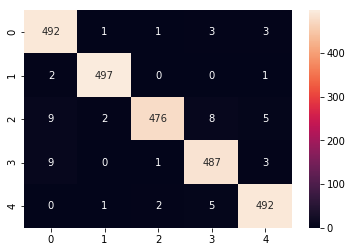

In [209]:
#Confusion Matrix
confusionmatrix=[]

temp=[0,0,0,0,0]
for i in range(len(class_wise)):
    confusionmatrix.append(temp)
    temp=copy.deepcopy(temp)
for i in range(len(test_label)):
    confusionmatrix[test_label[i]][label_pred[i]]=confusionmatrix[test_label[i]][label_pred[i]]+1
seaborn.heatmap(confusionmatrix,annot=True,fmt="d")   

# Q2

In [210]:
train_doc=0
for i in range(len(train_data)):
    train_doc+=len(train_data[i].keys())


In [211]:
start8=time.time()

In [212]:
#Created IDF Vectors
idf_vector={}
idf=[]
tf_idf_main={}
counter=0
for j in vocub_main:

    count=0
    for k in range(len(train_data)):
        for i in train_data[k]:
           
            if counter%20000000==0:
                print("Counter : ",counter)
            counter+=1
            if j in train_data[k][i]:
                count+=1
        
    idf_vector[j]=np.log(train_doc/(1+count))

Counter :  0
Counter :  20000000
Counter :  40000000
Counter :  60000000
Counter :  80000000
Counter :  100000000
Counter :  120000000
Counter :  140000000
Counter :  160000000


In [213]:

# tdf_idf_main={}
# counter=0
# for i in corpus.keys():
#     count=0
#     f={}
#     for j in vocub_main:
#         if counter%1000000==0:
#             print("Counter : ",counter)
#         counter+=1
#         f[j]=0
#     tdf_idf_main[i]=f

In [214]:
#To make the dictionary for tf
train_data1=copy.deepcopy(train_data)

for i in range(len(train_data1)):
    for j in train_data[i].keys():
        s=size(train_data[i][j])
        for k in train_data[i][j]:
            train_data1[i][j][k]=train_data[i][j][k]/float(s)
        

In [215]:
# To tf- vectors

tf_idf_main={}
counter=0
tf={}
for k in range(len(train_data1)):
    for i in train_data1[k]:
        for j in vocub_main:
            if counter%20000000==0:
                print("Counter : ",counter)
            counter+=1
            
            if j in train_data1[k][i]:
                if j not in tf.keys():
                    tf[j]=train_data1[k][i][j]
                else:
                    if train_data1[k][i][j]>tf[j]:
                        tf[j]=train_data1[k][i][j]



Counter :  0
Counter :  20000000
Counter :  40000000
Counter :  60000000
Counter :  80000000
Counter :  100000000
Counter :  120000000
Counter :  140000000
Counter :  160000000


In [216]:
## To tf-idf vectors
tf_idf={}
for i in tf.keys():
    tf_idf[i]=tf[i]*idf_vector[i]


In [217]:
start9=time.time()
print(start9-start8)

198.13738584518433


In [218]:
# To threshold the features
threshold=0.6
sort_by_value = sorted(tf_idf.items(), key=lambda value: value[1],reverse=True)



In [219]:
vocub_main=[]
for i in range(int(len(sort_by_value)*0.6)):
    vocub_main.append(sort_by_value[i][0])

In [220]:
start10=time.time()

# Training the train data after feature selection

In [221]:
#Conditional Probability for terms given class
cond_prob={}
for i in range(len(class_wise)):
    v=0
    for k in train_data[i].keys():
        
        for j in vocub_main:
            if j in train_data[i][k]:
                v+=train_data[i][k][j]
    temp={}
    for k in vocub_main:
        sum=0
        for j in train_data[i].keys():
            if k in train_data[i][j]:
                sum+=train_data[i][j][k]
        temp[k]=(sum+1)/float(v+vocub_size)
    cond_prob[i]=temp
    
        

In [222]:
start11=time.time()
print(start11-start10)

36.4926598072052


# Testing the test set

In [223]:
# For testing the test set
test_label=[]
for i in range(len(test_data)):
    for j in range(len(test_data[i])):
        test_label.append(i)
        

In [224]:
label_pred=[]
for i in range(len(test_data)):
    
    for j in test_data[i]:
        store=[]
        for m in range(len(class_wise)):
            sum=np.log(prior[m])
            for k in test_data[i][j]:
                try:
                    sum+=test_data[i][j][k]*np.log(cond_prob[m][k])
                except:
                    sum+=0
            store.append(sum)
        label_pred.append(np.argmax(store))
    
            

In [225]:
print("Test Accuracy : ",accuracy(label_pred,test_label))

Test Accuracy :  0.9796


In [226]:
start12=time.time()
print(start12-start11)

5.449003219604492


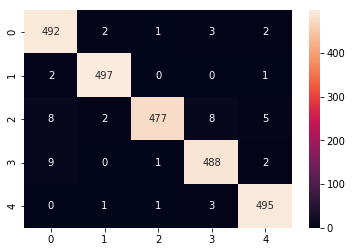

In [227]:
#Confusion Matrix
confusionmatrix=[]

temp=[0,0,0,0,0];'/'
for i in range(len(class_wise)):
    confusionmatrix.append(temp)
    temp=copy.deepcopy(temp)
for i in range(len(test_label)):
    confusionmatrix[test_label[i]][label_pred[i]]=confusionmatrix[test_label[i]][label_pred[i]]+1
seaborn.heatmap(confusionmatrix,annot=True,fmt="d")   